<a href="https://colab.research.google.com/github/PlaZMaD/ml_miem_2024/blob/main/Seminar_6_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Семинар 6 Метод опорных векторов
----------

(использованы материалы курса [Машинное обучение в Питоне](https://www.hse.ru/edu/courses/450323352))


## Необходимые библиотеки

In [ ]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.lines as mlines, seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]

def newline(p1, p2, color=None): # technical function for drawing lines
    #function kredits to: https://fooobar.com/questions/626491/how-to-draw-a-line-with-matplotlib
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color=color)
    ax.add_line(l)
    return l

# Классификатор с максимальной границей

В общем случае, если наши данные можно идеально разделить с помощью гиперплоскости, то на самом деле существует бесконечное число таких гиперплоскостей.

Естественным выбором является **максимальная маржинальная гиперплоскость** (также известная как **оптимальная разделяющая гиперплоскость**), которая представляет собой разделяющую гиперплоскость, наиболее удаленную от обучающих наблюдений. То есть, мы можем вычислить (перпендикулярное) расстояние от каждого учебного наблюдения до данной разделяющей гиперплоскости; наименьшее такое расстояние является минимальным расстоянием от наблюдений до гиперплоскости и известно как **margin**.

Затем мы можем классифицировать тестовое наблюдение на основе того, по какую сторону гиперплоскости оно лежит. Это известно как **классификатор с максимальной границей**.

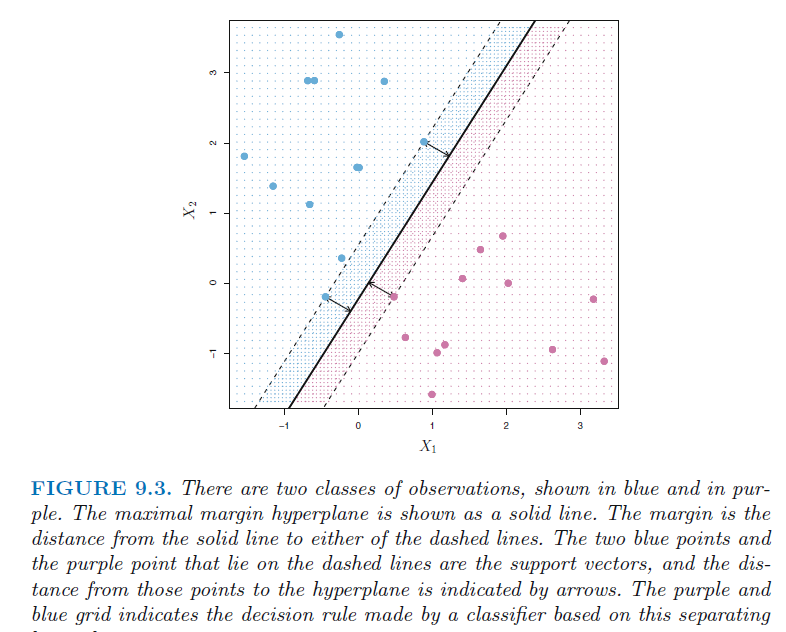

Теперь мы рассмотрим задачу построения гиперплоскости с максимальной границей на основе набора *n* обучающих наблюдений $x_1, ... x_n \ в \mathbb{R}^p$ и соответствующих меток классов $y_1,..., y_n$, $y_i = \pm1$. на основе набора *n* обучающих наблюдений $x_1, ... x_n \ в \mathbb{R}^p$ и соответствующих меток классов $y_1,..., y_n$, $y_i = \pm1$. Вкратце, гиперплоскость с максимальной границей - это решение оптимизационной задачи

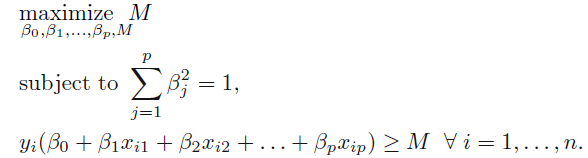

Мы можем эквивалентно сформулировать это как:

$\large{\begin{align*}
&\underset{\beta_i}{\text{maximize}}\ M\\
&\text{таким образом}\ y_i(\beta_0 + \beta^Tx_i)\geq M\|\beta\|_2\\ для\ всех\ i=1,\ldots, n.
\end{align*}}$

или (поскольку любое решение $\beta$ может быть масштабировано константой, и мы задаем $\|\beta\|_2 = \frac{1}{M}$):

$\large{\begin{align*}
&\underset{\beta_i}{\text{minimize}}\ \|\beta\|_2\\
&\text{таким образом}\ y_i(\beta_0 + \beta^Tx_i)\geq 1\ \ для\ всех\ i=1,\ldots, n.
\end{align*}}$.

Которую мы можем эффективно решить с помощью метода множителей Лагранжа.

## Загрузка данных

Сегодня мы будем работать с набором данных [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). Набор данных по ирисов Фишера - это многомерный набор данных, созданный британским статистиком, евгеником и биологом Рональдом Фишером в 1936 году.

Набор данных состоит из 50 образцов каждого из трех видов ирисов (Iris setosa, Iris virginica и Iris versicolor). У каждого образца были измерены четыре характеристики: длина и ширина чашелистиков и лепестков в сантиметрах. На основе комбинации этих четырех признаков Фишер разработал линейную дискриминантную модель для отличия видов друг от друга.

In [ ]:
iris = load_iris()

X = iris.data
Y = iris.target
print('Feature names:', iris.feature_names)
print('Target names:', iris.target_names)
X[:3]

In [ ]:
import pandas as pd
pd.DataFrame(X, columns = iris.feature_names).info()

In [ ]:
pd.DataFrame(X, columns = iris.feature_names).describe()

Для лучшей иллюстрации того, как работают опорные векторы, давайте спроецируем наши данные на двумерную плоскость. Используем метод [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).

Поскольку для классификатора с максимальной границей нам нужна задача бинарной классификации, мы переходим от 3 классов к 2, объединяя виды ириса 'versicolor' и 'virginica'.

Обратите внимание, что если мы объединим классы таким образом, наши данные станут линейно разделимыми.

In [ ]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
Y = (Y > 0).astype(int)*2-1 # [0,1,2] --> [False,True,True] --> [0,1,1] --> [0,2,2] --> [-1,1,1]
print('2D feature space:')
X[:3]
print('New classes (joined classes versicolor and virginica)')
print(set(Y))

In [ ]:
pd.DataFrame(X).describe().round(3)

Сейчас два класса линейно разделимы.

In [ ]:
d = {-1:'green', 1:'red'}
plt.title('Iris dataset: classes are lineary separable')
plt.scatter(X[:,0], X[:,1], c=[d[y] for y in Y])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2020)

# Реализация нашего собственного классификатора с максимальной границей

Основано на идее https://github.com/Laggg/SVM-by-hand/blob/master/SVM_by_hand.ipynb

# Функция потерь

В процессе обучения мы хотим штрафовать только те наблюдения, которые находятся на неправильной стороне поля. Для этого функция потерь **hinge loss** кажется идеальным кандидатом: $H = max(0, 1-M)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xx = np.linspace(-4,3,100000)
plt.plot(xx, [(x<0).astype(int) for x in xx], linewidth=2, label='1 if M<0, else 0')
plt.plot(xx, [np.log2(1+2.76**(-x))  for x in xx], linewidth=4, label='logistic = log(1+e^-M)')
plt.plot(xx, [np.max(np.array([0,1-x]))  for x in xx], linewidth=4, label='hinge = max(0,1-M)')
plt.title('Loss = F(Margin)')
plt.grid()
plt.legend(prop={'size': 14});

In [ ]:
def add_bias_feature(a):
    a_extended = np.zeros((a.shape[0],a.shape[1]+1))
    a_extended[:,:-1] = a
    a_extended[:,-1] = int(1)
    return a_extended


class MaximalMarginClassifier(object):
    """
    etha: float(default - 0.01)
        Learning rate, gradient step
    alpha: float, (default - 1.0)
        Regularization parameter in 0.5*alpha*||w||^2
    epochs: int, (default - 200)
        Number of epochs of training
    """
    def __init__(self, etha=0.01, alpha=0.1, epochs=200):
        self._epochs = epochs
        self._etha = etha
        self._alpha = alpha
        self._w = None
        self.history_w = []
        self.train_errors = None
        self.val_errors = None
        self.train_loss = None
        self.val_loss = None

    def fit(self, X_train, Y_train, X_val, Y_val, verbose=False): #arrays: X; Y =-1,1
        if len(set(Y_train)) != 2 or len(set(Y_val)) != 2:
            raise ValueError("Number of classes in Y is not equal 2!")

        X_train = add_bias_feature(X_train)
        X_val = add_bias_feature(X_val)
        self._w = np.random.normal(loc=0, scale=0.05, size=X_train.shape[1])
        self.history_w.append(self._w)
        train_errors = []
        val_errors = []
        train_loss_epoch = []
        val_loss_epoch = []

        for epoch in range(self._epochs):
            tr_err = 0
            val_err = 0
            tr_loss = 0
            val_loss = 0
            for i,x in enumerate(X_train):
                margin = Y_train[i]*np.dot(self._w,X_train[i])
                if margin >= 1: # classified correctly
                    self._w = self._w - self._etha*self._alpha*self._w/self._epochs
                    tr_loss += self.hinge_loss(X_train[i],Y_train[i])
                else: # if classified incorrectly, we get into the separating band 0<m<1
                    self._w = self._w +\
                    self._etha*(Y_train[i]*X_train[i] - self._alpha*self._w/self._epochs)
                    tr_err += 1
                    tr_loss += self.hinge_loss(X_train[i],Y_train[i])
                self.history_w.append(self._w)
            for i,x in enumerate(X_val):
                val_loss += self.hinge_loss(X_val[i], Y_val[i])
                val_err += (Y_val[i]*np.dot(self._w,X_val[i])<1).astype(int)
            if verbose:
                print('epoch {}. Errors={}. Mean Hinge_loss={}'\
                      .format(epoch,err,loss))
            train_errors.append(tr_err)
            val_errors.append(val_err)
            train_loss_epoch.append(tr_loss)
            val_loss_epoch.append(val_loss)
        self.history_w = np.array(self.history_w)
        self.train_errors = np.array(train_errors)
        self.val_errors = np.array(val_errors)
        self.train_loss = np.array(train_loss_epoch)
        self.val_loss = np.array(val_loss_epoch)


    def predict(self, X:np.array) -> np.array:
        y_pred = []
        X_extended = add_bias_feature(X)
        for i in range(len(X_extended)):
            y_pred.append(np.sign(np.dot(self._w,X_extended[i])))
        return np.array(y_pred)


    def hinge_loss(self, x, y):
        return max(0,1 - y*np.dot(x, self._w))



In [ ]:
# Initialize and train
mmc = MaximalMarginClassifier(etha=0.005, alpha=0.006, epochs=150)
mmc.fit(X_train, Y_train, X_test, Y_test)

print('Weights for the equation w0*x_i[0]+w1*x_i[1]+w2=0')
print(mmc._w) # w0*x_i[0]+w1*x_i[1]+w2=0

plt.plot(mmc.train_loss, linewidth=2, label='train_loss')
plt.plot(mmc.val_loss, linewidth=2, label='test_loss')
plt.legend(prop={'size': 15})
plt.show()

In [ ]:
mmc.val_loss

Визуализация границы.

In [ ]:
d = {-1:'green', 1:'red'}
plt.scatter(X_train[:,0], X_train[:,1], c=[d[y] for y in Y_train])

#  w0*x_i[0]+w1*x_i[1]+w2*1 = 0
#  x_i[0]=0, x_i[1]=0
newline([0,-mmc._w[2]/mmc._w[1]],[-mmc._w[2]/mmc._w[0],0], 'blue')
newline([0,1/mmc._w[1]-mmc._w[2]/mmc._w[1]],[1/mmc._w[0]-mmc._w[2]/mmc._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=1
newline([0,-1/mmc._w[1]-mmc._w[2]/mmc._w[1]],[-1/mmc._w[0]-mmc._w[2]/mmc._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=-1
plt.show()

На тестовой выборке.

In [ ]:
y_pred = mmc.predict(X_test)
y_pred[y_pred != Y_test] = -100 # find and mark classification error
print('Number of errors on test set: ', (y_pred == -100).astype(int).sum())
d1 = {-1:'lime', 1:'m', -100: 'black'} # black = classification error
plt.scatter(X_test[:,0], X_test[:,1], c=[d1[y] for y in y_pred])
newline([0,-mmc._w[2]/mmc._w[1]],[-mmc._w[2]/mmc._w[0],0], 'blue')
newline([0,1/mmc._w[1]-mmc._w[2]/mmc._w[1]],[1/mmc._w[0]-mmc._w[2]/mmc._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=1
newline([0,-1/mmc._w[1]-mmc._w[2]/mmc._w[1]],[-1/mmc._w[0]-mmc._w[2]/mmc._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=-1
plt.show()

# Неразделимый случай

Классификатор с максимальной границей - это очень естественный способ классификации, *если существует разделяющая гиперплоскость*. Однако *во многих случаях разделяющая гиперплоскость не существует*, и поэтому *не существует максимального маржинального классификатора*. В этом случае проблема оптимизации не имеет
решения с $M>0$.

Для иллюстрации этого случая мы применим еще одно преобразование к данным Iris и объединим классы setosa и versicolor.

Теперь классы НЕ являются линейно разделяемыми.

In [ ]:
# блок подготовки данных
iris = load_iris()
X = iris.data
Y = iris.target

pca = PCA(n_components=2)
X = pca.fit_transform(X)
Y = (Y == 2).astype(int)*2-1 # [0,1,2] --> [False,False,True] --> [0,1,1] --> [0,0,2] --> [-1,1,1]

d = {-1:'green', 1:'red'}
plt.title('Iris dataset: classes are NOT lineary separable')
plt.scatter(X[:,0], X[:,1], c=[d[y] for y in Y])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2020)

# Классификатор с опорными векторами

Когда классы неразделимы, мы можем быть готовы рассмотреть классификатор, основанный на гиперплоскости, которая не идеально разделяет два класса в угоду:

1) большей устойчивости к отдельным наблюдениям;
2) лучшей классификации большинства обучающих наблюдений.

То есть, может быть целесообразно неправильно классифицировать несколько учебных наблюдений, чтобы лучше классифицировать остальные наблюдения.

Классификатор с **опорными векторами**, иногда называемый **классификатором с мягкой границей**, делает именно это. Вместо того чтобы стремиться к максимально возможной границе, чтобы каждое наблюдение находилось не только на правильной стороне гиперплоскости, но и на правильной стороне границе, мы позволяем некоторым наблюдениям находиться на неправильной стороне границы или даже на неправильной стороне гиперплоскости. (Граница является мягкой, поскольку она может быть нарушена некоторыми обучающими наблюдениями).

Классификатор опорных векторов классифицирует тестовое наблюдение в зависимости от того, по какую сторону от гиперплоскости оно находится. Гиперплоскость выбирается таким образом, чтобы правильно разделить большинство учебных наблюдений на два класса, но может
но может неправильно классифицировать несколько наблюдений. Она является решением оптимизационной задачи

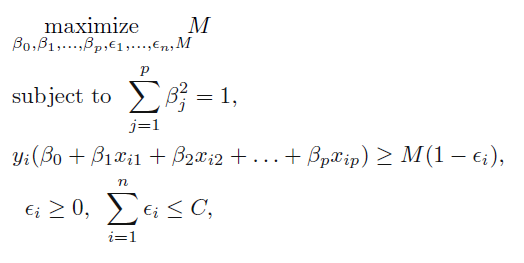

где $C$ - неотрицательный настроечный параметр.

$M$ - ширина границы; мы стремимся к тому, чтобы эта величина была как можно больше.

$\epsilon_1,..., \epsilon_n$ - это **слабые переменные**, которые позволяют отдельным наблюдениям находиться не на той стороне границы или гиперплоскости.

# Implementation of SVM

In [ ]:
def add_bias_feature(a):
    a_extended = np.zeros((a.shape[0],a.shape[1]+1))
    a_extended[:,:-1] = a
    a_extended[:,-1] = int(1)
    return a_extended

class CustomSVM(object):
    """
    etha: float(default - 0.01)
        Learning rate, gradient step
    alpha: float, (default - 1.0)
        Regularization parameter in 0.5*alpha*||w||^2
    epochs: int, (default - 200)
        Number of epochs of training
    """
    def __init__(self, etha=0.01, alpha=0.1, epochs=200):
        self._epochs = epochs
        self._etha = etha
        self._alpha = alpha
        self._w = None
        self.history_w = []
        self.train_errors = None
        self.val_errors = None
        self.train_loss = None
        self.val_loss = None


    def fit(self, X_train, Y_train, X_val, Y_val, verbose=False): #arrays: X; Y =-1,1

        if len(set(Y_train)) != 2 or len(set(Y_val)) != 2:
            raise ValueError("Number of classes in Y is not equal 2!")

        X_train = add_bias_feature(X_train)
        X_val = add_bias_feature(X_val)
        self._w = np.random.normal(loc=0, scale=0.05, size=X_train.shape[1])
        self.history_w.append(self._w)
        train_errors = []
        val_errors = []
        train_loss_epoch = []
        val_loss_epoch = []

        for epoch in range(self._epochs):
            tr_err = 0
            val_err = 0
            tr_loss = 0
            val_loss = 0
            for i,x in enumerate(X_train):
                margin = Y_train[i]*np.dot(self._w,X_train[i])
                if margin >= 1: # классифицируем верно
                    self._w = self._w - self._etha*self._alpha*self._w/self._epochs
                    tr_loss += self.soft_margin_loss(X_train[i],Y_train[i])
                else: # классифицируем неверно или попадаем на полосу разделения при 0<m<1
                    self._w = self._w +\
                    self._etha*(Y_train[i]*X_train[i] - self._alpha*self._w/self._epochs)
                    tr_err += 1
                    tr_loss += self.soft_margin_loss(X_train[i],Y_train[i])
                self.history_w.append(self._w)
            for i,x in enumerate(X_val):
                val_loss += self.soft_margin_loss(X_val[i], Y_val[i])
                val_err += (Y_val[i]*np.dot(self._w,X_val[i])<1).astype(int)
            if verbose:
                print('epoch {}. Errors={}. Mean Hinge_loss={}'\
                      .format(epoch,err,loss))
            train_errors.append(tr_err)
            val_errors.append(val_err)
            train_loss_epoch.append(tr_loss)
            val_loss_epoch.append(val_loss)
        self.history_w = np.array(self.history_w)
        self.train_errors = np.array(train_errors)
        self.val_errors = np.array(val_errors)
        self.train_loss = np.array(train_loss_epoch)
        self.val_loss = np.array(val_loss_epoch)


    def predict(self, X:np.array) -> np.array:
        y_pred = []
        X_extended = add_bias_feature(X)
        for i in range(len(X_extended)):
            y_pred.append(np.sign(np.dot(self._w,X_extended[i])))
        return np.array(y_pred)


    def hinge_loss(self, x, y):
        return max(0,1 - y*np.dot(x, self._w))


    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x,y)+self._alpha*np.dot(self._w, self._w)

Обучаем классификатор.

In [ ]:
svm = CustomSVM(etha=0.03, alpha=0.0001, epochs=300)
svm = CustomSVM(etha=0.03, alpha=1., epochs=300)

svm.fit(X_train, Y_train, X_test, Y_test)

print('Weights for the equation w0*x_i[0]+w1*x_i[1]+w2=0')
print(svm._w) # w0*x_i[0]+w1*x_i[1]+w2=0

plt.plot(svm.train_loss, linewidth=2, label='train_loss')
plt.plot(svm.val_loss, linewidth=2, label='test_loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

Так как данные не являются линейно сепарабельными, мы не смогли избежать ошибок даже на обучающем множестве, однако их количество невелико.

In [ ]:
d = {-1:'green', 1:'red'}
plt.scatter(X_train[:,0], X_train[:,1], c=[d[y] for y in Y_train])
newline([0,-svm._w[2]/svm._w[1]],[-svm._w[2]/svm._w[0],0], 'blue') #  w0*x_i[0]+w1*x_i[1]+w2*1=0
                                                                   #  x_i[0]=0, x_i[1]=0
newline([0,1/svm._w[1]-svm._w[2]/svm._w[1]],[1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=1
newline([0,-1/svm._w[1]-svm._w[2]/svm._w[1]],[-1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=-1
plt.show()

Посмотрим на тестовой выборке:

In [ ]:
y_pred = svm.predict(X_test)
y_pred[y_pred != Y_test] = -100 # find and mark classification error
print('Number of errors on the test set: ', (y_pred == -100).astype(int).sum())
d1 = {-1:'lime', 1:'m', -100: 'black'} # black = classification error
plt.scatter(X_test[:,0], X_test[:,1], c=[d1[y] for y in y_pred])
newline([0,-svm._w[2]/svm._w[1]],[-svm._w[2]/svm._w[0],0], 'blue')
newline([0,1/svm._w[1]-svm._w[2]/svm._w[1]],[1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=1
newline([0,-1/svm._w[1]-svm._w[2]/svm._w[1]],[-1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=-1
plt.show()

# Реализация Sklearn

Как обычно, существует также реализация Sklearn.

In [ ]:
from sklearn import svm
from sklearn.metrics import recall_score

C = 1.0 # regularization parameter SVM
svc = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
y_predict = svc.predict(X_test)
print('Recall score: ', round(recall_score(Y_test, y_predict), 4))

In [ ]:
h = 0.01
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.6)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

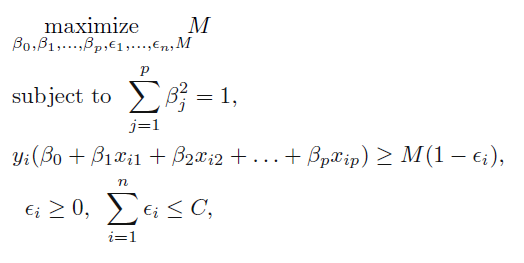

# Метод опорных векторов

Классификатор опорных векторов является естественным подходом для классификации с двумя классами, если граница между двумя классами линейна. Однако часто на практике мы сталкиваемся с нелинейными границами классов. В случае с классификатором опорных векторов мы можем решить проблему возможных нелинейных границ между классами аналогичным образом, путем расширения пространства признаков с помощью квадратичных, кубических и даже полиномиальных функций более высокого порядка.

Это приводит нас к следующей проблеме оптимизации:

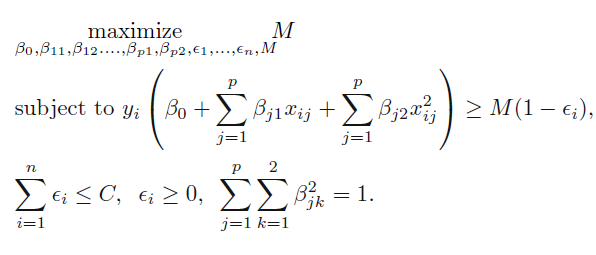

Почему это приводит к нелинейной границе принятия решений? В расширенном пространстве признаков граница принятия решения на самом деле линейна.

Но в исходном пространстве признаков граница принятия решения имеет вид $q(x) = 0$, где q - квадратичный многочлен, и его решения, как правило будут нелинейными.


**Машина опорных векторов (SVM)** является расширением классификатора опорных векторов.

Основная идея заключается в том, что мы можем захотеть расширить пространство признаков, чтобы учесть нелинейную границу между классами. Ядровый подход, который мы описываем здесь, является  эффективным вычислительным подходом для реализации этой идеи.

Интересно заметить, что оказывается, что решение проблемы классификатора опорных векторов включает только внутренние произведения наблюдений (в отличие от самих наблюдений).

In [ ]:
iris = load_iris()
X = iris.data
Y = iris.target

pca = PCA(n_components=2)
X = pca.fit_transform(X)
Y = (Y == 1).astype(int)*2-1 # [0,1,2] --> [False,False,True] --> [0,1,1] --> [0,0,2] --> [-1,1,1]

d = {-1:'green', 1:'red'}
plt.title('Iris dataset: classes are lineary separable')
plt.scatter(X[:,0], X[:,1], c=[d[y] for y in Y])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2020)

Попробуем применить классификатор с опорными векторами, как и раньше (для этого установим параметр `kernel = 'linear'`).

Предсказуемо, svc не удается разделить классы, и recall очень мал.

In [ ]:
from sklearn import svm
from sklearn.metrics import recall_score

C = 1.0 # regularization parameter SVM"
svc = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
y_predict = svc.predict(X_test)
print('Recall score: ', round(recall_score(Y_test, y_predict), 4))

In [ ]:
h = 0.01
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.6)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

Теперь используем SVM (параметр `kernel='rbf'`).

Успех! SVM удается разделить классы и получить высокий скор!

In [ ]:
svc = svm.SVC(kernel='rbf', C=1).fit(X_train, Y_train)
y_predict = svc.predict(X_test)
print('Recall score: ', round(recall_score(Y_test, y_predict), 4))

In [ ]:
h = 0.01
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.6)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')
plt.show()

# SVMs с более чем двумя классами

Для многоклассовой классификации существует два основных подхода:

1) **один против одного** Построение SVM, каждая из которых сравнивает пару классов. Окончательная классификация выполняется путем отнесения тестового наблюдение к тому классу, к которому оно чаще всего относилось.

2) **one-versus-all** Настроить *K* SVM, каждый раз сравнивая один из всех *K* классов с оставшимися *K - 1* классами.


В sklearn реализованы оба подхода

```
decision_function_shape{'ovo', 'ovr'}, default='ovr'
```

Возвращать ли функцию принятия решения "один против остальных" ('ovr') формы (n_samples, n_classes), как все остальные классификаторы, или оригинальную функцию принятия решения "один против одного" ('ovo') из libsvm, которая имеет форму (n_samples, n_classes * (n_classes - 1) / 2). Однако one-vs-one ('ovo') всегда используется как многоклассовая стратегия. Для бинарной классификации параметр игнорируется.





 Наконец, мы будем работать с оригинальными метками Iris и 3-классовой классификацией.



In [ ]:
iris = load_iris()
X = iris.data
Y = iris.target

pca = PCA(n_components=2)
X = pca.fit_transform(X)

d = {0:'green', 1:'red', 2:'yellow'}
plt.title('Iris dataset: classes are lineary separable')
plt.scatter(X[:,0], X[:,1], c=[d[y] for y in Y])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2020)

Мы задаем

```
 decision_function_shape = 'ovr'
```

Классы хорошо разделены!



In [ ]:
svc = svm.SVC(kernel='rbf', gamma='auto', C=1, decision_function_shape = 'ovr').fit(X_train, Y_train)
y_predict = svc.predict(X_test)
print('Recall score: ', round(recall_score(Y_test, y_predict, average = 'weighted'), 4))

In [ ]:
h = 0.1
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.6)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')
plt.show()

# Упражнение

Настройте параметры SVM для улучшения результата классификации.